# Séries Temporais - Produção de Energia

Este notebook é referente a apresentação 1 da disciplina Séries Temporais do curso de Ciência de Dados e Inteligência Artificial da UFPB.

notebooks referencia:

https://github.com/carlosfab/escola-data-science/tree/master/notebooks

https://www.kaggle.com/ludovicocuoghi/electric-production-forecast-lstm-sarima

In [1]:
# importando biblioteca 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

In [2]:
# importanto os dados de produção de energia elétrica
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv', index_col='DATE', parse_dates=True)
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
df.shape

(397, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [5]:
df.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [6]:
# Data mínima e máxima
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

<AxesSubplot:xlabel='DATE'>

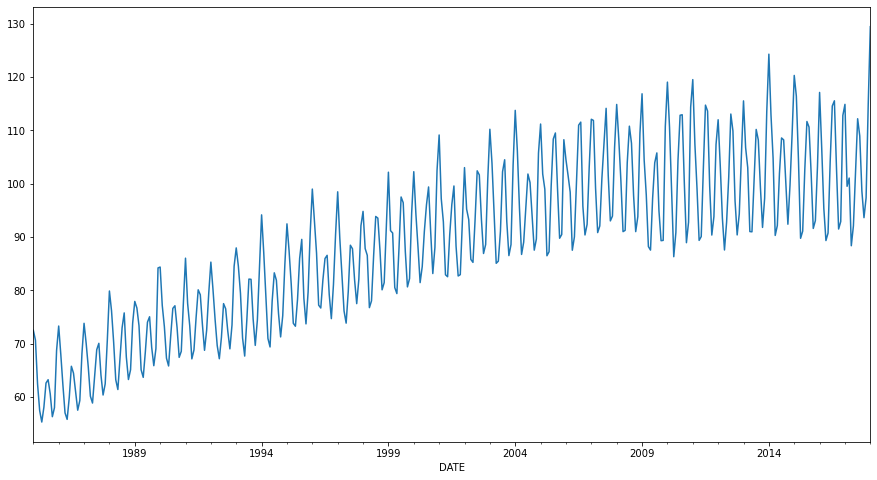

In [7]:
df.columns = ['producao']

df['producao'].plot(figsize=(15,8))

### Prevendo com ARIMA

<Figure size 1080x576 with 0 Axes>

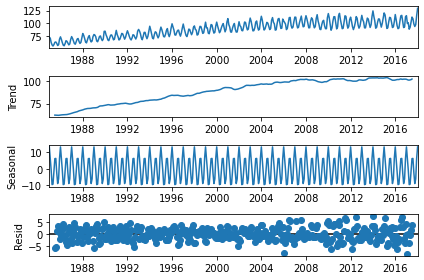

In [8]:
#decomposição da série temporal

resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(15, 8))  
fig = resultado.plot()


#### Teste de estacionariedade

In [9]:
# Teste de estacionariedade. 

result = adfuller(df['producao'].dropna())

print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-2.2569903500472397
p-valor:0.18621469116586947


In [10]:
# Auto ARIMA
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, m=6, D=1, start_P=1, start_Q=1, max_P=2, 
                           max_Q=2, information_criterion='aic', trace=True, 
                           error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1912.925, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2404.500, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1998.731, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2057.803, Time=0.16 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2000.250, Time=0.31 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1880.044, Time=0.69 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=inf, Time=1.78 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=1925.181, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=1942.791, Time=0.38 sec
 ARIMA(2,1,1)(2,1,1)[6]             : AIC=1881.313, Time=0.85 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1880.682, Time=0.74 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=1955.485, T

In [11]:
# criando o sarima 

model = SARIMAX(df,order=(2,1,2),  seasonal_order=(1, 1, 2, 6))
resultado_sarimax = model.fit()

C:\Users\elayn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\elayn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\elayn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\elayn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [12]:
# resultados do modelo SARIMAX(2,1,2)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          producao   No. Observations:                  397
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -899.089
Date:                           Wed, 20 Oct 2021   AIC                           1814.177
Time:                                   13:48:28   BIC                           1845.907
Sample:                               01-01-1985   HQIC                          1826.755
                                    - 01-01-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0873      0.350     -0.249      0.803      -0.773       0.599
ar.L2          0.2828      0.214      1.321      0.187      -0.137       0.702
ma.L1         -0.2981      0.337     -0.884      0.377      -0.959       0.363
ma.L2         -0.6397      0.329     -1.944      0.052      -1.285       0.005
ar.S.L6       -0.9976      0.003   -380.281      0.000      -1.003      -0.992
ma.S.L6        0.1145      0.040      2.832      0.005       0.035       0.194
ma.S.L12      -0.7764      0.037    -20.853      0.000      -0.849      -0.703
sigma2         5.5549      0.307     18.092      0.000       4.953       6.157
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                42.27
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Teste com os 12 meses anteriores

predicoes = resultado_sarimax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [14]:
# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(103.05574754658727, 112.29471805730921)

In [15]:
predicao_media[0]

107.67523280194824

In [16]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

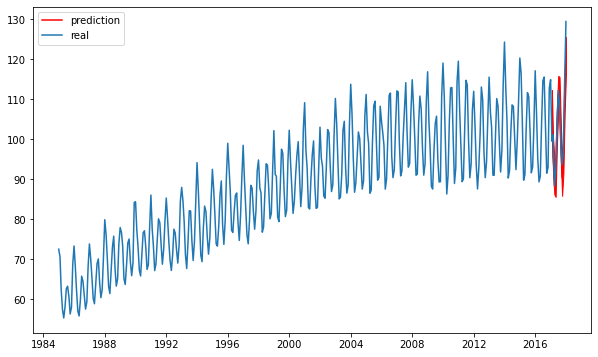

In [17]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [18]:
# erro quadrado médio

rmse_sarima = sqrt(mean_squared_error(df[-12:].values,predicao_media.values))
print(rmse_sarima)

4.193232029449164


#### Previsão com Arima

In [19]:
# Previsão para 24 meses

forecast = resultado_sarimax.get_forecast(steps=24)
forecast_medio = forecast.predicted_mean
forecast_medio.size

24

In [20]:
# intervalo de confiança

intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[10], intervalo_acima_f[10]

(106.25362090342091, 118.06348995996953)

In [21]:
forecast_medio[10]

112.15855543169522

In [22]:
# pegando as datas de predição

datas_forecast = np.asarray(forecast_medio.index)
pred_dates=np.asarray(predicao_media.index)

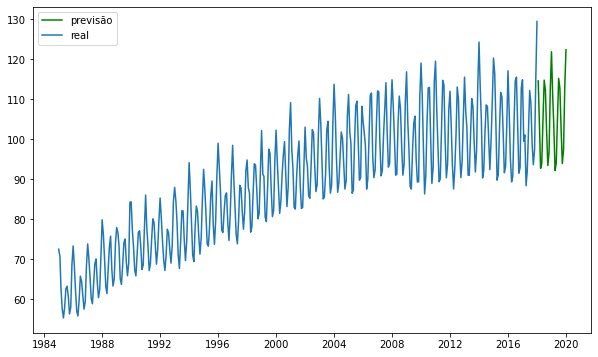

In [23]:
dates=np.asarray(df.index)
plt.figure(figsize=(10,6))
plt.plot(datas_forecast,forecast_medio.values,color='green',label='previsão')

#plt.plot(datas_previsao,predicao_media.values,color='red',label='teste')

plt.plot(dates,df.values, label='real')
plt.legend(loc='upper left')
plt.show()